# The Steady State

The Steady State is a fundamental state of a dynamic system, studied not only in the system biology but also in biochemistry and molecular biology. The reason for that is that the steady state gives us a reference point from which one could consider the system's behavior. Living organisms remain at a dynamic steady state where their internal composition at both cellular and gross levels are relatively constant in an instantly changing environment.

## Outline 
1. Definition and difference from the thermodynamic equilibrium
2. Solving the Steady State analytically 
3. Computing the Steady State
    - Time course simulation
    - Newton-Raphson method
    - Software: Tellurium
4. Perturbations and their types
5. Introduction to stability
6. Sensitivity analysis

Before we start, I would like you to present topics, which we cover in my presentation. 
After introducing a concept of the dynamic steady state, we will try to answer the question, how we could derive steady state solution of a model mathematically. 
We will reuse these thoughts to turn them into computational approaches. Being able to compute the steady state quickly will allow us to play around with the model's parameters in order to study its behavior. We will take a look at different kinds of models, based on their steady state properties.  As a conclusion, we will take a look at one method to figure out the relationships between the model's response and parameters.

## The Steady State vs. Equilibrium 
The steady state (stationary state) of a state of chemical system where the rates of change of all species are zero while at the same time the net rates are non-zero. 

| Steady state | Thermodynamic Equilibrium  |
|------|------|
| species concentrations constant | species concentrations constant |
| net flows of energy and mass | no net flows |
| $\forall i \frac{dS_i}{dt} =  0 \\ v_i \neq 0$| $\forall i \frac{dS_i}{dt} = 0 \\ v_i = 0 $|   

<img src="Scheme-of-the-insertion-of-Na-K-ATPase-into-the-plasma-membrane-Ionic-transport-is.png" alt="Drawing" style="width: 600px" align="center"> 

The literature sometimes refers to a steady state as an equilibrium point which in terms of a living system is not correct. In the example on the panel below, we can see the sodium-potassium pump inside of the cell membrane.  One of the main functions of the cell membrane is to maintain asymmetric concentrations of inorganic ions in order to keep the ionic steady state different from the electrochemical equilibrium. The amount of ions of either side is not equal but constant, thus the charge separation exists. Such a state could be only reached by an open system. As we see, ions move across the cell membrane such that a constant resting membrane potential is achieved. 
If there were no net flows(e.g. blocked pumps or transporters), the concentrations after a certain time will reach the equilibrium, the electrochemical potential of the cell membrane would be lost and we could say that the cell is dead.

## Solving the Steady State analytically 
### Example 1

$S_1 \rightleftharpoons ^{k_1}_{k_2} S_2 $  
**Question:** what are the Steady State concentrations of the reversible model?

$X_0 \rightarrow ^{v_0} S_1 \rightleftharpoons ^{k_1}_{k_2} S_2 \rightarrow^{k_3} X_1 $

$X_0 \rightarrow^{v_0} S_1 \rightarrow^{k_1} S_2 \rightarrow^{k_3} X_1 $   
$X_0 \rightarrow^{v_0} S_1 \rightarrow^{v_1 = k_1\cdot S_1} S_2 \rightarrow^{v_2 = k_3 \cdot S_2} X_1 $ 

The system equation  
$\frac{dS}{dt} = Nv$

$\begin{bmatrix}
-1 & 0 & 0\\
1 & -1 & 0\\
0 & 1 & -1\\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix} v_0\\ v_1\\ v_2 \end{bmatrix} = \begin{bmatrix} \frac{dX_0}{dt}\\ \frac{dS_1}{dt}\\ \frac{dS_2}{dt}\\ \frac{dX_1}{dt} \end{bmatrix}$

$\frac{dX_0}{dt} = - v_0$   
$\frac{dS_1}{dt} = v_0 - k_1 \cdot S_1$   
$\frac{dS_2}{dt} = k_1 \cdot S_1 - k_3 \cdot S_2$   
$\frac{dX_1}{dt} = k_3 \cdot S_2$

**1. Way**   
Using **Matematica** to calculate the solution for the system of differential equations.   

$S_1(t) = v_0 \frac{1 - e^{-k_1t}}{k_1}$    

$S_2(t) = v_0 \frac{k_1(1 - e^{-k_3t})+k_3(e^{-k_1t}-1)}{k_3(k_1-k_3)}$   

**Answer**: steady state concentrations are   

$S_1(\infty) = \frac{v_0}{k_1}$   

$S_2(\infty) = \frac{v_0(k_1-k_3)}{k_3(k_1-k_3)} = \frac{v_0}{k_3}$ 

**2. Way**   
Set rates of changes to zero.  

$0 = v_0 - k_1 \cdot S_1 \Leftrightarrow S_1 = \frac{v_0}{k_1}$  

$0 = k_1 \cdot S_1 - k_3 \cdot S_2 \Leftrightarrow S_2 = \frac{k_1 \cdot S_1}{k_3}=\frac{\frac{v_0}{k_1} \cdot k_1}{k_3} = \frac{v_0}{k_3}$ 

Now when we have learned the biological meaning of the Steady State, let us derive it mathematically.

We start with a simple **reversible** model with reaction rate constants $k_1$ for the forward and $k_2$ for the reverse reaction.

Then we extend this model to an open system by adding a **source** reaction with rate $v_0$ and a **sink** reaction with a rate constant $k_1$. 

**Assumptions**
1.Mass-action kinetics (1.Order)   
2.Source and sink reactions are irreversible and $X_0,X_1$ are boundary species.   

**To make it easy to solve :**   
1.Set the reverse rate constant $k_2$ to 0.   
2.Set initial concentrations of $S_1,S_2$ to 0 in order to derive a **time course solution**. 

What if the time tends to infinity? Recap $e = 2.718$, so $e^{-k_1t}$ will be very small and $1 - e^{-k_1t}$ tends to 1, so that we could approximate      
$S_1(\infty) = \frac{v_0}{k_1}$   
And $k_1(1 - e^{-k_3t})$ can be approximated to $k_1$, as well as $k_3(e^{-k_1t}-1)$ to $-k_3$    
$S_2(\infty) = \frac{v_0(k_1-k_3)}{k_3(k_1-k_3)} = \frac{v_0}{k_3}$    

Differential equations for that system are   
$\frac{dS_1}{dt} = v_0 - k_1 \cdot [S_1]$   
$\frac{dS_2}{dt} = k_1 \cdot [S_1] - k_3 \cdot [S_2]$   

Set rates of changes to zero.  
$0 = v_0 - k_1 \cdot [S_1] \Leftrightarrow [S_1] = \frac{v_0}{k_1}$   
$0 = k_1 \cdot [S_1] - k_3 \cdot [S_2] \Leftrightarrow [S_2] = \frac{k_1 \cdot [S_1]}{k_3}=\frac{\frac{v_0}{k_1} \cdot k_1}{k_3} = \frac{v_0}{k_3}$  

**Conclusion** : a reaction rate through each of the three reaction steps is $v_0$. The system displays a continious flow of mass from source to sink. This can only continue undisturbed as long as the source material $X_0$ never runs out.

### Visualization of the solved model

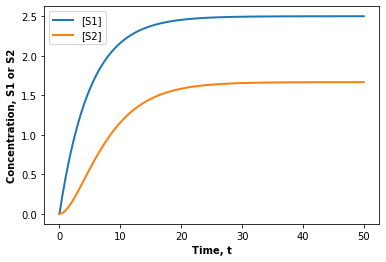

In [3]:
import tellurium as te
#compute reaching the steady state 
r = te.loada ( '''
    v0: $Xo -> S1; k0;
    v1: S1 -> S2; k1*S1;
    v2: S2 -> $X1; k3*S2;
    // set up model initial conditions
    k0 = 0.5; Xo = 1.0;
    X1 = 0; k1 = 0.2; k3 = 0.3; 
''')
r.simulate(0,50,100);
r.plot(xtitle = "Time, t", ytitle = "Concentration, S1 or S2");

# Solving the Steady State analytically 
## Example 2: Graphical procedure 
**Question:** how rate constants ($k$'s) influence the steady state concentrations?   
$X_0 \rightarrow^{v_1} S_1 \rightarrow^{v_2} X_1 $   

$v_1 = k_1X_0$  
$v_2 = k_2S_1$  

$\frac{dS_1}{dt} = v_1 - v_2 = k_1X_0 - k_2S_1$  
$0 = k_1X_0 - k_2S_1 \Leftrightarrow k_1X_0 = k_2S_1 \Leftrightarrow v_1=v_2$ 

<img src="rate_S1conc.png">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s1_list = [c for c in np.arange(0,5,0.01)]
k1 = 0.4
x0 = 1
v1 = [k1*x0 for s1 in s1_list]
v2_1 = [0.1*s1 for s1 in s1_list ]
v2_2 = [0.2*s1 for s1 in s1_list ]
v2_3 = [0.3*s1 for s1 in s1_list ]
#plot v1
plt.plot(s1_list, v1, label = "v1")
plt.ylabel('Reaction rate v1 and v2')
plt.xlabel('Substrate concentration S1')
plt.plot(s1_list,v2_1, label = "v2")
plt.plot(s1_list,v2_2, label = "v2")
plt.plot(s1_list,v2_3, label = "v2")
plt.legend()
plt.text(0.0,0.5,'k1')
plt.text(3.2,1.2,'k2 = 0.3')
plt.text(3.2,0.84,'k2 = 0.2')
plt.text(4,0.5,'k2 = 0.1')
plt.annotate('v1 = v2', xy=(1.4, 0.4), xytext=(0.8, 0.7), 
             arrowprops = { "arrowstyle": '->'})
plt.savefig('ss_reaction_rates.png')
plt.show()


# Solving the Steady State analytically 
## Example 3: optional
$X_0 \leftrightarrow^{v_1} S_1 \rightarrow^{v_2} S_2 \rightarrow^{v_3} X_1$    
Rate laws  
$v_1 = k_1X_0 - k_2S_1$  
$v_2 = k_3S_1$  
$v_3 = k_4S_2$  
Differential equations for that system  
$\frac{dS_1}{dt} = v_1 - v_2 = (k_1X_0 - k_2S_1) - k_3S_1 $   
$\frac{dS_2}{dt} = v_2 - v_3 = k_3S_1 - k_4S_2 $   
Set both equations to 0 and solve for concentrations   
$S_1 = \frac{k_1X_0}{k_2+k_3}$  
$S_2 = \frac{k_3k_1X_0}{(k_2+k_3)k_4}$   
Insert a steady state solution into the appropriate rate law: e.g. $S_2$ into $v_3$ 
The steady state flux   
$J = \frac{k_3k_1X_0}{k_4}$  
Observation: the first step is no longer the rate limiting step

We can illustrate the steady state using a graphical procedure. Assumptions: $X_0, X_1$ - boundary species, first-order mass-action kinetics.  

In the figure both reaction rates have been plotted as a function of the floating species concentration $S_1$. 

The reaction rate for $k_1$ is a horizontal line, because there is no product inhibition. 
The second reactions $v_2$ is shown as a stright line with slope $k_2$. The intersections mark points where reaction rates are equal, that is when the rate of change of floating species concnetration is zero.

By varying the $k_2$ we observe different effects on the steady state concentration. $k_2$ increases -> $S1$ decreases, because the second reaction goes faster.

At the steady state, the rate of mass transfer across a reaction is called the flux, $J$

# Computing the steady state  
Two approaches:   
1. Run a time course simulation for a long period, that trajectories of concentrations reach the steady state.
2. Set models differential equations to zero and solve numerically.   
$f(x, p) = 0$

# Computing the steady state
## 1. Time course simulation
$X_0 \rightarrow ^{v_0} S_1 \rightleftharpoons ^{k_1}_{k_2} S_2 \rightarrow^{k_3} X_1 $ 

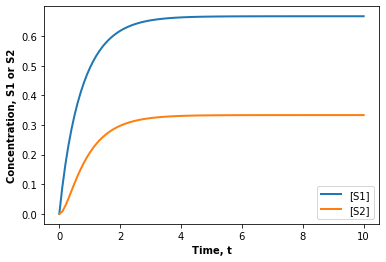

0.6666644206995016 0.333331689250633


In [5]:
r = te.loada ( '''
    J0: $Xo -> S1; v0;
    J1: S1 -> S2; k1*S1 - k2*S2;
    J2: S2 -> $X1; k3*S2;
    // set up model initial conditions
    v0 = 1;
    X1 = 0; k1 = 2; k2 = 1; k3 = 3; 
''')
r.simulate(0,10,100);
r.plot(xtitle = "Time, t", ytitle = "Concentration, S1 or S2");
print(r.S1, r.S2)

## Advantages:  
1. Straightforward

## Disadvantages
1. Time and memory consuming (based on reaction rate constants)
2. Works only if steady state is **stable**: what if trajectories diverge?


# Computing the steady state
## 2. Newton-Raphson method
$f(x, p) = 0$   
**Problem**: compute a root of $f(x) = x^2 - a = 0$ 

Newton showed, that if **g** ("guess") is an **approximation** to the root of $f(x)$, than  
$g - \frac{f(g)}{f'(g)}$   
is a **better approximation**.    

$f(x)= 0 \Leftrightarrow x^2 - a = 0$

Newton showed, that if g ("guess") is an approximation to the root of $f(x)$, that $g - \frac{f(g)}{f'(g)}$ is better approximation, where $f'(g)$ is derivative.   
$f(x) = x^2 - a$   
First derivative is $2x$   
Newton-Raphson says : given a guess g, a better guess for root is   
$g - \frac{g^2 - a}{2g}$   

## Geometrical explanation :   
<img src="newtonRaphsonMethod.png" style="width: 600px" >

**Problem**: compute a root of $f(x) = x^2 - 25 = 0$ 

In [6]:
epsilon = 0.01
y = 25.0
guess = y/2.0
counter = 1
#while difference between 25 and (guess)^2 is big
while abs(guess*guess - y) >= epsilon:
    guess = guess - (guess**2 - y)/(2*guess)
    print('Iteration ', counter, ' : Square root of', y, " is maybe. ", guess)
    counter+= 1
print("Square root of ", y, ' is', guess)

Iteration  1  : Square root of 25.0  is maybe.  7.25
Iteration  2  : Square root of 25.0  is maybe.  5.349137931034482
Iteration  3  : Square root of 25.0  is maybe.  5.011394106532552
Iteration  4  : Square root of 25.0  is maybe.  5.000012953048684
Square root of  25.0  is 5.000012953048684


## Newton-Raphson method for many reactions

**Normal form**  

$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$   

**Extension for a matrix form**  

$x_{k+1} = x_k - [\frac{\partial f(x)}{\partial x}]^{-1} f(x_k)$  

**Detour --> Jacobian matrix**  $[\frac{\partial f(x)}{\partial x}]$

## Newton-Raphson method ##
- One of **many** numerical methods
- Not guaranteed to converge to the solution
- Solution depends on the starting point --> do a simulation first
- **Unmodified** method **rarely used** --> Tellurium uses NLEQ2, Newton-like algorithm

**Reversible model**   
$X_0 \rightarrow ^{v_1} S_1 \rightarrow ^{v_2} S_2 \rightarrow^{v_3} X_1 $  

$\frac{dS_1}{dt} = (k_1X_0 - k_2S_1) - (k_3S_1 - k_4S_2)$ 

$\frac{dS_2}{dt} = (k_3S_1 - k_4S_2) - (k_5S_2 - k_6X_1)$ 

$x_k = \begin{bmatrix} S_1 \\ S_2 \end{bmatrix}$  
$f_k = \begin{bmatrix} (k_1X_0 - k_2S_1) - (k_3S_1 - k_4S_2) \\ (k_3S_1 - k_4S_2) - (k_5S_2 - k_6X_1) \end{bmatrix}$

**Jacobian matrix**

$\frac{\partial f(x)}{\partial x} = \begin{bmatrix} \frac{d(\frac{dS_1}{dt})}{dS_1} & \frac{d(\frac{dS_1}{dt})}{dS_2} \\ \frac{d(\frac{dS_2}{dt})}{dS_1} & \frac{d(\frac{dS_2}{dt})}{dS_2}  \end{bmatrix} = \begin{bmatrix} 1.1. & 1.2 \\ 2.1 & 2.2 \end{bmatrix}$  

**Reminder** :   
$ \frac{d}{dx}(c) = 0$   
$\frac{d}{dx}(x) = 1$  
$\frac{d}{dx}(cu) = c\frac{du}{dx}$  

$(1.1) \ \frac{d(\frac{dS_1}{dt})}{dS_1} = \frac{d((k_1X_0 - k_2S_1) - (k_3S_1 - k_4S_2))}{dS_1} = -k_2 -k_3 $   
$(1.2) \ \frac{d(\frac{dS_1}{dt})}{dS_2} = \frac{d((k_1X_0 - k_2S_1) - (k_3S_1 - k_4S_2))}{dS_2} = k_4 $  
$(2.1) \ \frac{d(\frac{dS_2}{dt})}{dS_1} = \frac{dS_2}{dt} = (k_3S_1 - k_4S_2) - (k_5S_2 - k_6X_1) = k_3$  
$(2.2) \ \frac{d(\frac{dS_2}{dt})}{dS_2} = \frac{dS_2}{dt} = (k_3S_1 - k_4S_2) - (k_5S_2 - k_6X_1) = -k_4 -k_5$   

$\frac{\partial f(x)}{\partial x} = \begin{bmatrix} -k_2 - k_3 & -k_4 \\ k_3 & -k_4-k_5\end{bmatrix}$


## Newton-method for a reversible model

In [ ]:
import sympy as sp
# constants 
k1 = 3.4 
k2 = 0.2
k3 = 2.3  
k4 = 0.56
k5 = 5.6
k6 = 0.12
X0 = 10
X1 = 0.0
# equations 
# x_k = [s1
#       s2]
S1 = 1
S2 = 1
guess = np.array([[S1],[S2]])
print('Initial guess S1: ', S1, ', S2: ', S2)
def dS1(X0, S1, S2):
    solution = (k1*X0 - k2*S1) - (k3*S1 - k4*S2)
    return solution

def dS2(X1, S1, S2):
    solution = (k3*S1 - k4*S2) - (k5*S2 - k6*X1)
    return solution
counter = 0
epsilon = 0.01
print("Initial dS1/dt ", dS1(X0,guess[0,0], guess[1,0]))
print("dS2/dt ", dS2(guess[0,0],guess[1,0],X1))
while abs(dS1(X0,guess[0,0], guess[1,0])) > epsilon and abs(dS2(guess[0,0],guess[1,0],X1)) > epsilon:
    x_k = np.array([[dS1(X0, guess[0,0],guess[1,0])],[dS2(X1, guess[0,0],guess[1,0])]])
    jakob_matrix = np.array([[-k2 - k3, k4],
                        [k3, - k4 - k5]])
    print(jakob_matrix)
    inv_jakob_matrix = np.linalg.inv(jakob_matrix)
    guess = np.subtract(guess, np.multiply(inv_jakob_matrix, x_k))
    counter += 1
    print('Iteration : ', counter, ' S1 ', guess[0,0], ' S2 ', guess[1,0], ' dS1/dt ', x_k[0,0], ' dS2/dt ', x_k[1,0])

In [ ]:
nr_alg_model = te.loada ( '''
    J0: $Xo -> S1; k1*Xo - k2*S1;
    J1: S1 -> S2; k3*S1 - k4*S2;
    J2: S2 -> $X1; k5*S2 - k6*X1;
    // set up model initial conditions
    k1 = 3.4; k2 = 0.2; k3 = 2.3; k4 = 0.56; k5 = 5.6; k6 = 0.12;
    Xo = 10.0; X1 = 0.0; S1 = 0.0; S2 = 0.0;    
''')
nr_alg_model.simulate(0,10,100);
nr_alg_model.plot(xtitle = "Time, t", ytitle = "Concentration, S1 or S2");
print('Concentration of S1 is', nr_alg_model.S1, ' and S2 ', nr_alg_model.S2)

Normal form   
$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$   
Extension for a matrix form
$x_{k+1} = x_k - [\frac{\partial f(x)}{\partial x}]^{-1} f(x_k)$    

$m$ is a number of **floating species** in model    

$x_k$ is a $m$-dimensional vector with guessed solutions (species concentrations),   

$f(x_k)$ is a vector, containing $f(x)$ for all $x_k$ ($m$ rates of change), 

$[\frac{\partial f(x)}{\partial x}]$ is $m\times m$ **invertible** Jacobian matrix

# Computing the steady state
## 3. Software: Tellurium 

The call to steadyState returns a value that represents the sum of squares of the rates of change. Therefore the smaller this value the more likely the steady state solution has been found. Often a value less that 10E-6 indicates a steady state has been found. After a successful call all the species levels will be at their steady state values.

In [7]:
nr_alg_model = te.loada ( '''
    J0: $Xo -> S1; k1*Xo - k2*S1;
    J1: S1 -> S2; k3*S1 - k4*S2;
    J2: S2 -> $X1; k5*S2 - k6*X1;
    // set up model initial conditions
    k1 = 3.4; k2 = 0.2; k3 = 2.3; k4 = 0.56; k5 = 5.6; k6 = 0.12;
    Xo = 10.0; X1 = 0.0; S1 = 0.0; S2 = 0.0;    
''')

In [8]:
# if the sum of squares of the rates of change < 10E-6 the Steady State has been found 
print(nr_alg_model.steadyState())
print("S1=", nr_alg_model.S1, "  S2=", nr_alg_model.S2)

3.972054645195637e-14
S1= 14.841269841269826   S2= 5.541383219954644


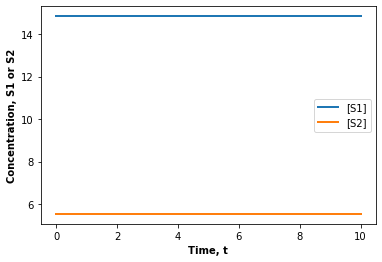

In [9]:
nr_alg_model.simulate(0,10,100);
nr_alg_model.plot(xtitle = "Time, t", ytitle = "Concentration, S1 or S2");

## Effect of perturbations
### Perturbing floating species
$X_0 \rightarrow^{v_1} S_1 \rightarrow^{v_2} X_1 $      
$v_1 = k_1X_0$  
$v_2 = k_2S_1$  

$k_1,k_2$ first-order reaction rate constants. First-order mass balance kinetics

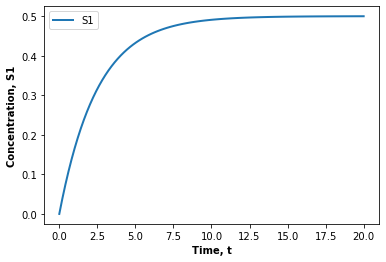

In [10]:
#Allow a system to reach a steady state 
per_model = te.loada('''
$Xo -> S1; k1*Xo;
S1 -> $X1; k2*S1;

k1 = 0.2; k2 = 0.4; 
Xo = 1; S1 = 0.0;
''')
sim_per_model = per_model.simulate(0,20,100,["time","S1"])
per_model.plot(xtitle = "Time, t", ytitle = "Concentration, S1");

The Steady State concentration of S1 is 0.5


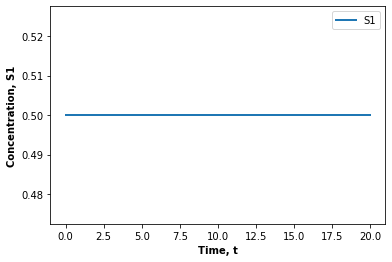

In [11]:
per_model.steadyState()
print("The Steady State concentration of S1 is", per_model.S1)
before_pert_model = per_model.simulate(0,20,100,["time","S1"])
per_model.plot(xtitle = "Time, t", ytitle = "Concentration, S1");

The author suggests to simulate the perturbation by $t < 20$ simulating the steady state, than injecting the $0.35$ units of $S_1$ and simulating further until the model relaxes back. After that one could combine two arrays in a one plot. However, the simulation where a time point of injecting is pre-defined is, in my opinion, more elegant.

In [ ]:
#perturb the concentration of S1 by 0.35 units at t=20
per_model.S1 = per_model.S1 + 0.35
#continue simulation 
after_pert_model = per_model.simulate(20,50,100,["time","S1"])
#merge plots 
result = np.vstack((before_pert_model, after_pert_model))
te.plotArray(result, xlabel = "Time, t", ylabel = "Concentration, S1", ylim = (0,1) );

As we see, the steady state concentration of $S_1$ is 0.5. Now we can consider applying perturbations on the steady state system.Inject 0.35 $S_1$ at $t = 20$   
We can also apply multiple perturbations on our system. 
at (time > 40): S1 = S1 - 0.35;

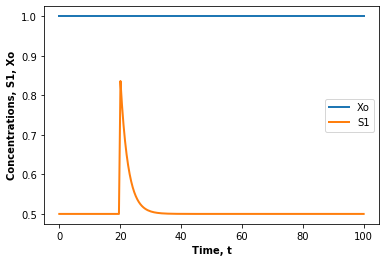

In [12]:
#perturb the concentration of S1 by 0.35 units at t=20
r = te.loada ('''
    $Xo -> S1; k1*Xo;
    S1 -> $X1; k2*S1;

    # initialize
    k1 = 0.2; k2 = 0.4; 
    Xo = 1; S1 = 0.5

    at (time > 20): S1 = S1 + 0.35;
''')

s = r.simulate (0, 100, 200, ['time', 'Xo', 'S1'])
r.plot(xtitle = "Time, t", ytitle = "Concentrations, S1, Xo")

## Effect of perturbations
### Perturbing model parameters 

Such parameters include kinetic constants/ inputs such boundary species/ addition of other effectors such drugs.

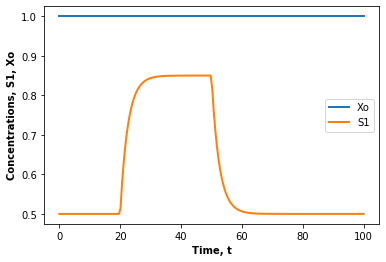

In [14]:
# perturb the rate constant k1 
r = te.loada ('''
    $Xo -> S1; k1*Xo;
    S1 -> $X1; k2*S1;

    # initialize
    k2 = 0.4; 
    Xo = 1; S1 = 0.5;
    
    k1 = 0.2
    at (time > 20): k1 = k1*1.7;
    at (time > 50): k1 = 0.2;
''')

s = r.simulate (0, 100, 200, ['time', 'Xo', 'S1'])
r.plot(xtitle = "Time, t", ytitle = "Concentrations, S1, Xo")
#at (time > 50): k1 = 0.2;

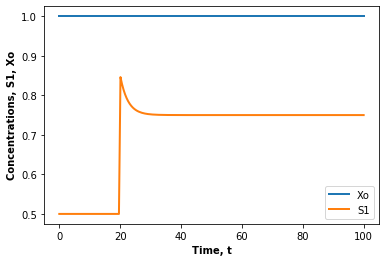

In [15]:
# perturb the rate constant k1 and inject 0.35 S1 
r = te.loada ('''
    $Xo -> S1; k1*Xo;
    S1 -> $X1; k2*S1;

    # initialize
    k2 = 0.4; 
    Xo = 1; 
    
    S1 = 0.5
    at (time > 20): S1 = S1 + 0.35;
    
    k1 = 0.2
    at (time > 20): k1 = k1*1.5;

''')

s = r.simulate (0, 100, 200, ['time', 'Xo', 'S1'])
r.plot(xtitle = "Time, t", ytitle = "Concentrations, S1, Xo")

## Stable vs. unstable system
| Stable system | Unstable system|
| --- | --- | 
|The concentrations of floating species **relax back** to the Steady State <br> concentrations they had before perturbation(s).| Instead of the perturbation relaxing back, it begins to **diverge**. |
|<img src="stable.png" alt="Drawing" style="width: 300px" align="left">|<img src="unstable.png" alt="Drawing" style="width: 300px"> | 

## Conserved cycles ##
- Group of species whose total mass is conserved during the evolution of the network.   
- **unstable systems**

$S_1 \leftrightarrows^{v_2}_{v_1} S_2$  

$S_1 + S_2 = const$  

$N = \begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix}$  

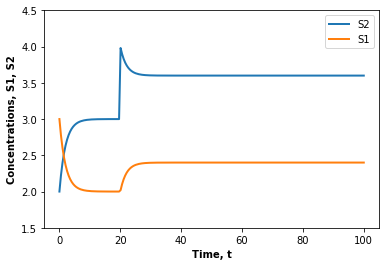

In [18]:
# Simulate the moity conserved cycle and perturbate it
cycle = te.loada ('''

    S1 -> S2; k1*S1;
    S2 -> S1; k2*S2;

    # initialize
    k1 = 0.3
    k2 = 0.2; 
    
    S1 = 3.0;
    S2 = 2.0
    at(time > 20): S2 = S2 + 1.0 ;
    

''')

ss_cycle = cycle.simulate (0, 100, 200, ['time', 'S2', 'S1'])
cycle.plot(xtitle = "Time, t", ytitle = "Concentrations, S1, S2",ylim = (1.5, 4.5))
# at(time > 20): S2 = S2 + 1.0 ;

**Moiety-conserved cycles, general remarks.**


There are many examples of moiety-conserved
cycles in metabolism, for instance, the adenine
nucleotide and NAD moieties are part of moiety-
conserved cycles. The adenine nucleotide is con-
served among the transformations that inter-
convert the forms AMP, ADP and ATP, while
NAD is conserved between its two forms, NAD
and NADH. Although it was stated that conserved
moieties experience neither net synthesis nor
breakdown, this situation can be only be an
approximation because the moiety must at some
point have been synthesised to be present in the
first place. For this reason. there will in general be
a slow metabolic turnover of conserved moiety by
other parts of metabolism. If we assume that the
moiety interconversions are fast (e.g. NAD --5
NADH) compared with their general turnover,
then over a suitably short interval (e.g. the time
course of an experiment) the moiety may be considered conserved.


Rows in the stochiometric matrix and Jacobian matrix linear dependent --> inverse is not computable --> fail to solve the Steady State

Solution: eliminate dependend rows from Jacobian by splitting the species into dependent and independent group. The dependent species is computed algebraically from the independent species. In simulation software only one reaction instead of two : 

$\frac{dS_1}{dt} = k_2S_2 - k_1S_1$

## Sensitivity analysis

Sensitivity analysis at steady state looks at how particular **model variables** are influenced by **model parameters**. 

$S = \frac{dV}{dp}\frac{p}{V}$

**WHY?** 
1. Determine important (high measure accuracy needed) and relatively unimportant reactions. 
2. Reflect response of a system to perturbations.    


# The end
<img src="please_steady_state.jpeg" alt="Drawing" style="width: 300px" align="right"> 
## Open questions 
1. Can we calculate a steady state using the Newton method, if the Jacobian matrix has linearly dependent rows? 
2. By which pathways that is the case?

# References 
[1] Gonçalves-de-Albuquerque, Cassiano & Silva, Adriana & Da Silva, Camila & Castro-Faria-Neto, Hugo & Burth, Patrícia. (2017). Na/K Pump and Beyond: Na/K-ATPase as a Modulator of Apoptosis and Autophagy. Molecules. 22. 578. 10.3390/molecules22040578. 

[2] Herbert M. Sauro. (1994). Moiety-conserved cycles and metabolic control analysis: problems in sequestration and metabolic channelling. Biosystems. Volume 33. Issue 1. 55-67. 10.1016/0303-2647(94)90061-2

[3] Herbert M. Sauro. (2014). Systems Biology: Introduction to Pathway Modeling. Chapter 12

[4] https://www.geeksforgeeks.org/program-for-newton-raphson-method/
